In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

In [2]:
cd ..

/


In [3]:
cd content/gdrive/My Drive/Tensorflow

/content/gdrive/My Drive/Tensorflow


In [4]:
cd mnist

/content/gdrive/My Drive/Tensorflow/mnist


In [0]:
import tensorflow as tf

In [0]:
from tensorflow.examples.tutorials.mnist import input_data

In [0]:
mnist=input_data.read_data_sets("MNIST",one_hot=True)

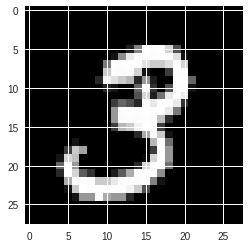

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
single_image=mnist.train.images[1].reshape(28,28)
plt.imshow(single_image,cmap='gist_gray')

In [0]:
def init_weights(shape):
  init_random_dist = tf.truncated_normal(shape,stddev=0.1)
  return tf.Variable(init_random_dist)

In [0]:
def init_bias(shape):
  init_bias_vals=tf.constant(0.1,shape=shape)
  return tf.Variable(init_bias_vals)

In [0]:
def conv2d(x,W):
  #x --> [batch,H,W,Channels]
  #W --> [filters H,filters W, Channels In , Channels OUT]
  return tf.nn.conv2d(x,W,strides=[1,1,1,1],padding='SAME')

In [0]:
def max_pool_2by2(x):
  return tf.nn.max_pool(x,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')

In [0]:
#convolutional layer
def convolutional_layer(input_x,shape):
  W= init_weights(shape)
  b = init_bias([shape[3]])
  return tf.nn.relu(conv2d(input_x,W)+b)

In [0]:
#normal(fully connected layer)
def normal_full_layer(input_layer,size):
  input_size = int(input_layer.get_shape()[1])
  W=init_weights([input_size,size])
  b=init_bias([size])
  return tf.matmul(input_layer,W)+b

In [0]:
#placeholders
x=tf.placeholder(tf.float32,shape=[None,784])

In [0]:
y_true=tf.placeholder(tf.float32,shape=[None,10])


In [0]:
#layers
x_image=tf.reshape(x,[-1,28,28,1])

In [18]:
convo_1=convolutional_layer(x_image,shape=[5,5,1,64])
convo_1_pooling=max_pool_2by2(convo_1)

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
convo_2=convolutional_layer(convo_1_pooling,shape=[5,5,64,128])

In [0]:
convo_2_pooling=max_pool_2by2(convo_2)

In [0]:
convo_2_flat=tf.reshape(convo_2_pooling,[-1,7*7*128])
full_layer_one=tf.nn.relu(normal_full_layer(convo_2_flat,1024))

In [22]:
#dropout
hold_prob=tf.placeholder(tf.float32)
full_one_dropout=tf.nn.dropout(full_layer_one,keep_prob=hold_prob)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
y_pred=normal_full_layer(full_one_dropout,10)

In [0]:
#loss function
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true,logits=y_pred))

In [0]:
#Optmizer
optimizer= tf.train.AdamOptimizer(learning_rate=0.001)
train=optimizer.minimize(cross_entropy)


In [0]:
init=tf.global_variables_initializer()


In [27]:
steps=5000

with tf.Session() as sess:
  sess.run(init)
  
  for i in range(steps):
    batch_x,batch_y=mnist.train.next_batch(50)
    sess.run(train,feed_dict={x:batch_x,y_true:batch_y,hold_prob:0.5})
    if i%100==0:
      print('ON STEP:{}'.format(i))
      print('ACCUracy:')
      matches=tf.equal(tf.argmax(y_pred,1),tf.argmax(y_true,1))
      acc=tf.reduce_mean(tf.cast(matches,tf.float32))
      print(sess.run(acc,feed_dict={x:mnist.test.images,y_true:mnist.test.labels,hold_prob:1.0}))
      print('\n')

ON STEP:0
ACCUracy:
0.1012


ON STEP:100
ACCUracy:
0.9398


ON STEP:200
ACCUracy:
0.9624


ON STEP:300
ACCUracy:
0.9661


ON STEP:400
ACCUracy:
0.9666


ON STEP:500
ACCUracy:
0.9745


ON STEP:600
ACCUracy:
0.9767


ON STEP:700
ACCUracy:
0.9798


ON STEP:800
ACCUracy:
0.9807


ON STEP:900
ACCUracy:
0.9788


ON STEP:1000
ACCUracy:
0.9811


ON STEP:1100
ACCUracy:
0.9819


ON STEP:1200
ACCUracy:
0.9876


ON STEP:1300
ACCUracy:
0.9862


ON STEP:1400
ACCUracy:
0.9882


ON STEP:1500
ACCUracy:
0.987


ON STEP:1600
ACCUracy:
0.985


ON STEP:1700
ACCUracy:
0.9841


ON STEP:1800
ACCUracy:
0.9867


ON STEP:1900
ACCUracy:
0.9866


ON STEP:2000
ACCUracy:
0.9872


ON STEP:2100
ACCUracy:
0.988


ON STEP:2200
ACCUracy:
0.9877


ON STEP:2300
ACCUracy:
0.9876


ON STEP:2400
ACCUracy:
0.9886


ON STEP:2500
ACCUracy:
0.9896


ON STEP:2600
ACCUracy:
0.987


ON STEP:2700
ACCUracy:
0.9865


ON STEP:2800
ACCUracy:
0.9856


ON STEP:2900
ACCUracy:
0.9888


ON STEP:3000
ACCUracy:
0.9904


ON STEP:3100
ACCUracy:
0